Librerias

In [ ]:
#poner todas las liberias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.signal import find_peaks

# ANALISIS GENERAL

In [ ]:
import pandas as pd

# Ruta del archivo Excel
ruta_archivo = '/content/PARQUE DE MOTORES - CONSOLIDADO.xlsx'

# Cargar el archivo Excel en un DataFrame
consolidado = pd.read_excel(ruta_archivo, sheet_name='Consolidado')

In [ ]:
# Muestra estadísticas descriptivas de todas las columnas numéricas
estadisticas_numericas = consolidado.describe()

print("Estadísticas Descriptivas de Columnas Numéricas:")
print(estadisticas_numericas)

# Muestra estadísticas descriptivas de todas las columnas, incluidas las categóricas
estadisticas_todas = consolidado.describe(include='all')

print("\nEstadísticas Descriptivas de Todas las Columnas:")
print(estadisticas_todas)

Estadísticas Descriptivas de Columnas Numéricas:
                N°  POTENCIA (HP)        R.P.M
count  1176.000000    1087.000000  1102.000000
mean    588.686224     197.942383  1375.337142
std     339.888982    1200.974490   381.281533
min       1.000000       0.250000     9.510000
25%     294.750000      15.000000  1420.000000
50%     588.500000      30.000000  1470.000000
75%     882.250000     100.000000  1480.000000
max    1177.000000   26015.000000  2981.000000

Estadísticas Descriptivas de Todas las Columnas:
                 N° PROCESO SECTOR/UBICACIÓN     EQUIPO MARCA  Nº SERIE  \
count   1176.000000    1176             1172       1176   1176     1176   
unique          NaN       4              142        844     48      952   
top             NaN  03 PMC   PTA. MOLIBDENO  CELDA Nº5    WEG  S/SERIE   
freq            NaN     403              111         22    229      206   
mean     588.686224     NaN              NaN        NaN    NaN      NaN   
std      339.888982     NaN 

In [ ]:
# Tabla resumen de RPM y Potencia con estadísticas descriptivas

# Seleccionar solo las columnas de RPM y Potencia
rpm_potencia = consolidado[['R.P.M', 'POTENCIA (HP)']]

# Calcular estadísticas descriptivas para RPM y Potencia
estadisticas_rpm_potencia = rpm_potencia.describe()

# Imprimir la tabla resumen
print("\nTabla Resumen de RPM y Potencia:")
estadisticas_rpm_potencia


Tabla Resumen de RPM y Potencia:


,R.P.M,POTENCIA (HP)
count,1102.000000,1087.000000
mean,1375.337142,197.942383
std,381.281533,1200.974490
min,9.510000,0.250000
25%,1420.000000,15.000000
50%,1470.000000,30.000000
75%,1480.000000,100.000000
max,2981.000000,26015.000000


In [ ]:
# Contar valores faltantes en las columnas "Potencia", "RPM" y "Voltaje"
faltantes_potencia = consolidado['POTENCIA (HP)'].isnull().sum()
faltantes_rpm = consolidado['R.P.M'].isnull().sum()
faltantes_voltaje = consolidado['VOLTAJE'].isnull().sum()

# Crear un DataFrame para mostrar la tabla de conteo
tabla_faltantes = pd.DataFrame({
    'Variable': ['Potencia', 'RPM', 'Voltaje'],
    'Faltantes': [faltantes_potencia, faltantes_rpm, faltantes_voltaje]
})

print("\nTabla de Conteo de Valores Faltantes:")
tabla_faltantes


Tabla de Conteo de Valores Faltantes:


,Variable,Faltantes
0,Potencia,89
1,RPM,74
2,Voltaje,67


In [ ]:
potencia = consolidado['POTENCIA (HP)']
conteos = potencia.value_counts()
print(conteos)

POTENCIA (HP)
20.0     112
30.0     108
100.0    107
15.0      67
10.0      59
        ... 
215.0      1
236.0      1
8.5        1
6.0        1
750.0      1
Name: count, Length: 70, dtype: int64


In [ ]:
voltajes = consolidado['VOLTAJE']
conteos = voltajes.value_counts()
print(conteos)

VOLTAJE
575         733
550         288
4000         30
380          18
4160          9
580           8
480           4
400/690       4
220           3
230           3
230/460       2
13200         2
400/690       1
230/400       1
225/380       1
572           1
585           1
Name: count, dtype: int64


# SEGMENTACIÓN DE VOLTAJE

In [ ]:
Voltaje = consolidado['VOLTAJE']
voltajes_exist= list(set(Voltaje))
print(voltajes_exist)

[4160, 4000, '230/460', 480, '230/400', 580, 550, 230, 585, 13200, '225/380', '400/690 ', '400/690', nan, 380, 220, 572, 575]


In [ ]:
consolidado2 = pd.DataFrame(consolidado) #Copia de archivo
bajovolt1 = [480, 230, '230/460', '225/380','230/400',380, 220,400,'400/690 ','400/690']
bajovolt2 = [550,575,572,585,580]
med_volt = [4160,4000]
alto_volt = [13200]

# Definir las condiciones
condiciones = [
    consolidado2['VOLTAJE'].isin(bajovolt1), # Use isin() to check if each value in the Series is present in the list
    consolidado2['VOLTAJE'].isin(bajovolt2),
    consolidado2['VOLTAJE'].isin(med_volt),
    consolidado2['VOLTAJE'].isin(alto_volt),
    consolidado2['VOLTAJE'].isna() # Use isna() to check for NaN values

]

# Definir los valores correspondientes para cada condición
valores = ['BAJO VOLTAJE 1(220-480)', 'BAJO VOLTAJE 2(550-585)', 'MEDIO VOLTAJE(4000/4160)', 'ALTO VOLTAJE(13200)', 'NAN']

# Añadir una nueva columna basada en las condiciones
consolidado2['SEG_VOLT'] = np.select(condiciones, valores, default='Desconocido')

In [ ]:
# Definir las condiciones
condiciones = [
    consolidado2['VOLTAJE'].isin(bajovolt1), # Use isin() to check if each value in the Series is present in the list
    consolidado2['VOLTAJE'].isin(bajovolt2),
    consolidado2['VOLTAJE'].isin(med_volt),
    consolidado2['VOLTAJE'].isin(alto_volt),
    consolidado2['VOLTAJE'].isna() # Use isna() to check for NaN values

]

# Definir los valores correspondientes para cada condición
valores = ['BAJO VOLTAJE 1(220-480)', 'BAJO VOLTAJE 2(550-585)', 'MEDIO VOLTAJE(4000/4160)', 'ALTO VOLTAJE(13200)', 'NAN']

# Añadir una nueva columna basada en las condiciones
consolidado2['SEG_VOLT'] = np.select(condiciones, valores, default='Desconocido')

In [ ]:
print(consolidado2)

        N° PROCESO SECTOR/UBICACIÓN                EQUIPO          MARCA   \
0        1  04 PPC     FILTROS MOLY     FILTRO TAMBOR 601             WEG   
1        2  04 PPC     FILTROS MOLY     FILTRO TORNILLO 1             WEG   
2        3  04 PPC     FILTROS MOLY  FILTRO ACCIONAMIENTO  ALLIS CHALMERS   
3        4  04 PPC     FILTROS MOLY   FILTRO TOR. SIN FIN          S/DATO   
4        5  04 PPC    DESCARGA MOLY         TORNILLO Nº3.          S/DATO   
...    ...     ...              ...                   ...             ...   
1171  1173  03 PMC     PLANTA P.T.R          BOMBA Nº 757             WEG   
1172  1174  03 PMC     PLANTA P.T.R          BOMBA Nº 758  ALLIS CHALMERS   
1173  1175  03 PMC     PLANTA P.T.R          BOMBA Nº 776          S/DATO   
1174  1176  03 PMC     PLANTA P.T.R          BOMBA Nº 786            TECO   
1175  1177  03 PMC     PLANTA P.T.R          BOMBA Nº 796          S/DATO   

              Nº SERIE   FRAME  POTENCIA (HP) VOLTAJE   R.P.M       Adicion

CANTIDAD DE MOTORES EN CADA VOLTAJE

In [ ]:
# Contar el número de registros en cada categoría
conteos = consolidado2['SEG_VOLT'].value_counts()
print(conteos)

SEG_VOLT
BAJO VOLTAJE 2(550-585)     1031
NAN                           67
MEDIO VOLTAJE(4000/4160)      39
BAJO VOLTAJE 1(220-480)       37
ALTO VOLTAJE(13200)            2
Name: count, dtype: int64


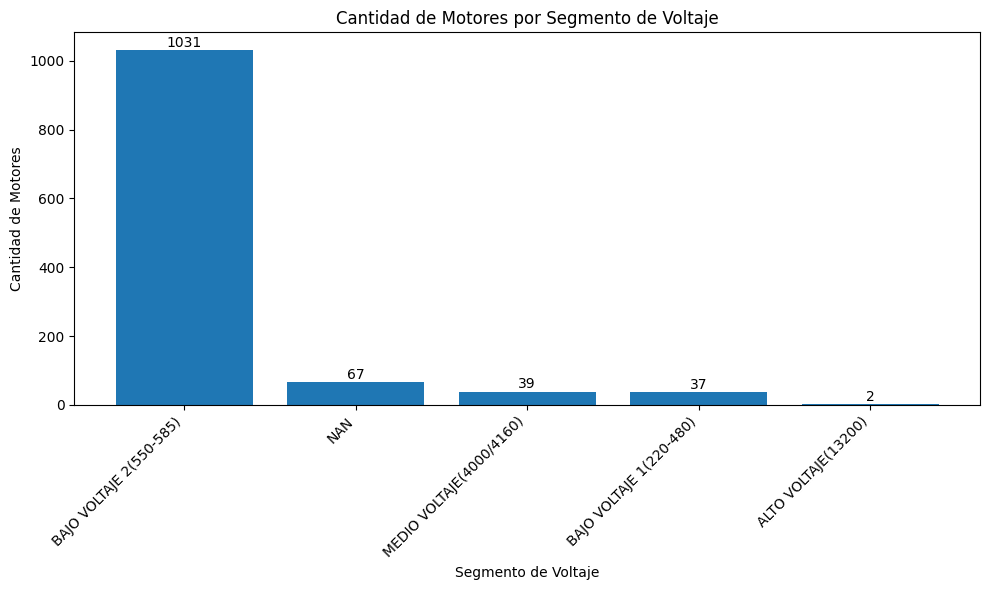

In [ ]:
# Contar el número de registros en cada categoría
conteos = consolidado2['SEG_VOLT'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
plt.bar(conteos.index, conteos.values)
plt.xlabel("Segmento de Voltaje")
plt.ylabel("Cantidad de Motores")
plt.title("Cantidad de Motores por Segmento de Voltaje")

# Agregar etiquetas con las cantidades
for i, v in enumerate(conteos.values):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor visualización
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()


CANTIDAD DE MOTORES POR PROCESO SEGMENTADO POR VOLTAJE

In [ ]:
conteo_seg_volt_por_proceso = consolidado2.groupby(['PROCESO', 'SEG_VOLT']).size()
print(conteo_seg_volt_por_proceso)


PROCESO  SEG_VOLT                
02 SAG   ALTO VOLTAJE(13200)           2
         BAJO VOLTAJE 1(220-480)      30
         BAJO VOLTAJE 2(550-585)     261
         MEDIO VOLTAJE(4000/4160)     14
         NAN                          35
03 PMC   BAJO VOLTAJE 2(550-585)     378
         MEDIO VOLTAJE(4000/4160)     12
         NAN                          13
04 PPC   BAJO VOLTAJE 1(220-480)       3
         BAJO VOLTAJE 2(550-585)     293
         MEDIO VOLTAJE(4000/4160)      9
         NAN                          14
05 FLT   BAJO VOLTAJE 1(220-480)       4
         BAJO VOLTAJE 2(550-585)      99
         MEDIO VOLTAJE(4000/4160)      4
         NAN                           5
dtype: int64


GRAFICO (Se puede mejorar)

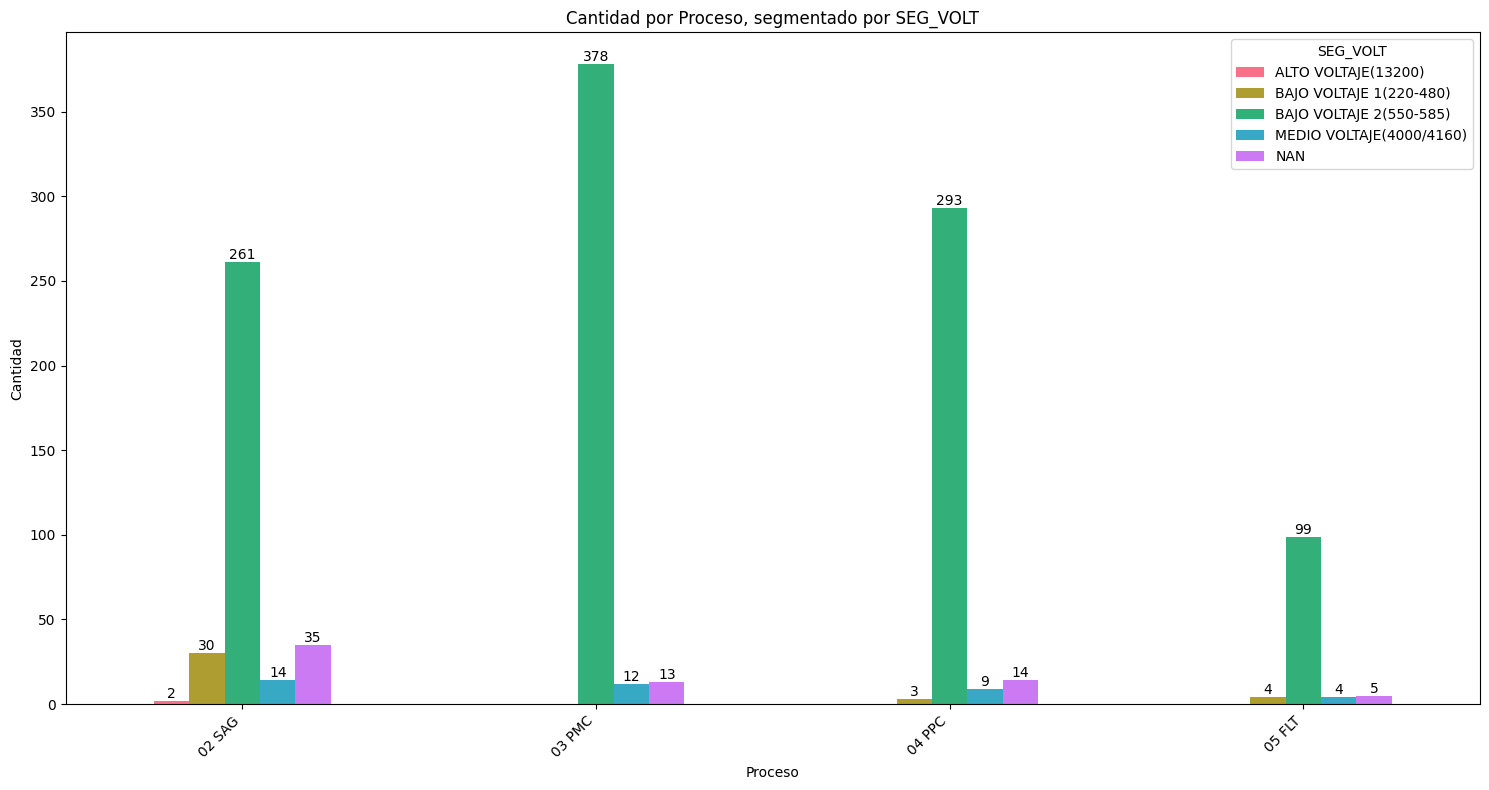

In [ ]:
# Definir una paleta de colores agradable usando seaborn
paleta_colores = sns.color_palette("husl", 5)  # Puedes cambiar "husl" por otras paletas como "coolwarm", "Set2", etc.

# Agrupar los datos por proceso y seg_volt
conteo_seg_volt_por_proceso = consolidado2.groupby(['PROCESO', 'SEG_VOLT']).size()

# Crear el histograma con la nueva paleta de colores
ax = conteo_seg_volt_por_proceso.unstack().plot(kind='bar', figsize=(15, 8), color=paleta_colores)

# Agregar el valor de cada segmento en las barras
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Para evitar etiquetas de valor en barras de altura 0
        x = p.get_x() + p.get_width() / 2
        y = height
        ax.text(x, y, str(int(height)), ha='center', va='bottom')

plt.xlabel('Proceso')
plt.ylabel('Cantidad')
plt.title('Cantidad por Proceso, segmentado por SEG_VOLT')
plt.xticks(rotation=45, ha='right')
plt.legend(title='SEG_VOLT')
plt.tight_layout()
plt.show()


# ANALISIS DE RPM

CONTEO DE MOTORES POR RPM

In [ ]:
conteos = consolidado['R.P.M'].value_counts()
print(conteos)

R.P.M
1480.0    226
1470.0    132
1475.0     88
1460.0     57
980.0      54
         ... 
1483.0      1
1850.0      1
940.0       1
1380.0      1
1750.0      1
Name: count, Length: 81, dtype: int64


Calcular Polos y frecuencia

In [ ]:
def determinar_polos_frecuencia(rpm):
    rangos_60hz = {
        3600: (2, 60),
        1800: (4, 60),
        1200: (6, 60),
        900: (8, 60),
        720: (10, 60),
        600: (12, 60),
        514: (14, 60),
        450: (16, 60),
        400: (18, 60),
        360: (20, 60),
        327: (22, 60),
        300: (24, 60)
    }
    rangos_50hz = {
        3000: (2, 50),
        1500: (4, 50),
        1000: (6, 50),
        750: (8, 50),
        600: (10, 50),
        500: (12, 50),
        428: (14, 50),
        375: (16, 50),
        333: (18, 50),
        300: (20, 50)
    }

    def buscar_valor_mas_cercano(rpm, rangos):
        # Buscar el valor más cercano superior
        valor_mas_cercano = None
        for valor_rpm in sorted(rangos.keys()):as
            if rpm <= valor_rpm:
                valor_mas_cercano = valor_rpm
                break
        if valor_mas_cercano is not None:
            return rangos[valor_mas_cercano]
        return (None, None)

    # Buscar el valor más cercano para 60 Hz
    resultado_60hz = buscar_valor_mas_cercano(rpm, rangos_60hz)

    # Buscar el valor más cercano para 50 Hz
    resultado_50hz = buscar_valor_mas_cercano(rpm, rangos_50hz)

    # Elegir el resultado que tenga la menor diferencia de RPM
    if resultado_50hz[0] is not None and resultado_60hz[0] is not None:
        diff_50hz = abs(rpm - next(val for val in sorted(rangos_50hz.keys()) if rpm <= val))
        diff_60hz = abs(rpm - next(val for val in sorted(rangos_60hz.keys()) if rpm <= val))

        if diff_50hz < diff_60hz:
            return resultado_50hz
        else:
            return resultado_60hz
    elif resultado_50hz[0] is not None:
        return resultado_50hz
    elif resultado_60hz[0] is not None:
        return resultado_60hz
    else:
        return (None, None)

In [ ]:
# Aplicar la función para determinar polos y frecuencia
consolidado2['Polos'], consolidado2['Frecuencia'] = zip(*consolidado2['R.P.M'].apply(determinar_polos_frecuencia))

In [ ]:
print(consolidado2)

        N° PROCESO SECTOR/UBICACIÓN                EQUIPO          MARCA   \
0        1  04 PPC     FILTROS MOLY     FILTRO TAMBOR 601             WEG   
1        2  04 PPC     FILTROS MOLY     FILTRO TORNILLO 1             WEG   
2        3  04 PPC     FILTROS MOLY  FILTRO ACCIONAMIENTO  ALLIS CHALMERS   
3        4  04 PPC     FILTROS MOLY   FILTRO TOR. SIN FIN          S/DATO   
4        5  04 PPC    DESCARGA MOLY         TORNILLO Nº3.          S/DATO   
...    ...     ...              ...                   ...             ...   
1171  1173  03 PMC     PLANTA P.T.R          BOMBA Nº 757             WEG   
1172  1174  03 PMC     PLANTA P.T.R          BOMBA Nº 758  ALLIS CHALMERS   
1173  1175  03 PMC     PLANTA P.T.R          BOMBA Nº 776          S/DATO   
1174  1176  03 PMC     PLANTA P.T.R          BOMBA Nº 786            TECO   
1175  1177  03 PMC     PLANTA P.T.R          BOMBA Nº 796          S/DATO   

              Nº SERIE   FRAME  POTENCIA (HP) VOLTAJE   R.P.M       Adicion

In [ ]:
conteos = consolidado2['Frecuencia'].value_counts()
print(conteos)

Frecuencia
50.0    1075
60.0      27
Name: count, dtype: int64


In [ ]:
conteos = consolidado2['Polos'].value_counts()
print(conteos)

Polos
4.0     839
6.0     141
8.0      62
2.0      33
24.0     14
16.0      7
14.0      4
12.0      2
Name: count, dtype: int64


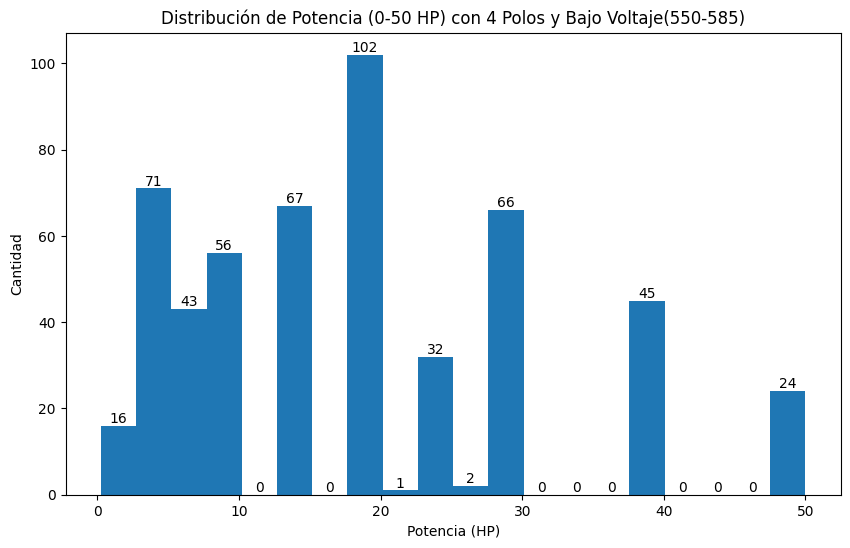

In [ ]:
# Filtrar los datos
data_filtered = consolidado2[
    (consolidado2['POTENCIA (HP)'] <= 50) &
    (consolidado2['Polos'] == 4) &
    (consolidado2['SEG_VOLT'] == 'BAJO VOLTAJE 2(550-585)')
]

# Crear el histograma
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(data_filtered['POTENCIA (HP)'], bins=20)

# Agregar etiquetas con la cantidad en cada barra
for i in range(len(n)):
    plt.text(bins[i] + (bins[i+1] - bins[i])/2, n[i], str(int(n[i])), ha='center', va='bottom')

# Configurar el gráfico
plt.xlabel('Potencia (HP)')
plt.ylabel('Cantidad')
plt.title('Distribución de Potencia (0-50 HP) con 4 Polos y Bajo Voltaje(550-585)')
plt.show()


In [ ]:
pip install openpyxl

In [ ]:
# Guardar el DataFrame como archivo Excel
consolidado2.to_excel('consolidado_motores_df.xlsx', index=False)

Distribución R.P.M

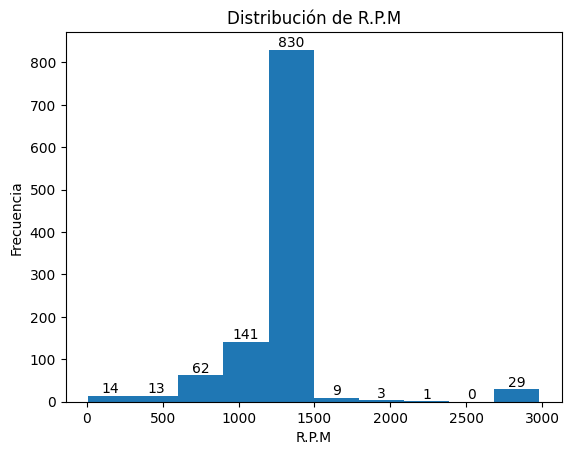

In [ ]:
# Crear el histograma de la columna 'R.P.M'
conteos, bins, patches = plt.hist(consolidado['R.P.M'], bins=10)  # Ajusta el número de bins según sea necesario

# Agregar etiquetas en la parte superior de cada barra
for count, x in zip(conteos, bins):
    plt.text(x + (bins[1] - bins[0]) / 2,  # Posición horizontal, centrada en cada barra
             count,  # Posición vertical (altura del texto)
             str(int(count)),  # Etiqueta de texto
             ha='center', va='bottom', fontsize=10)  # Alineación y tamaño de fuente

# Configurar etiquetas y título del gráfico
plt.xlabel('R.P.M')
plt.ylabel('Frecuencia')
plt.title('Distribución de R.P.M')
plt.show()


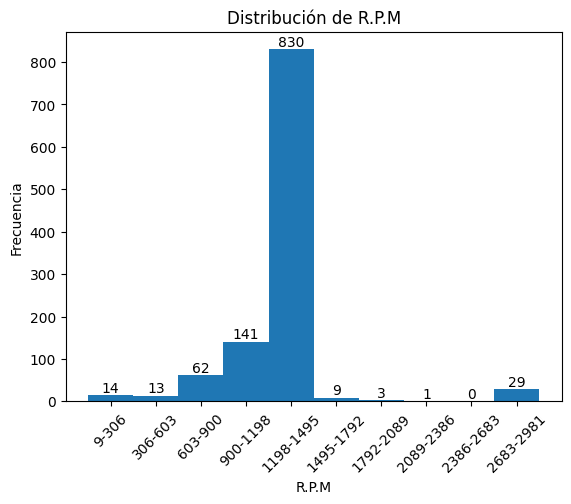

In [ ]:
# Crear el histograma de la columna 'R.P.M'
conteos, bins, patches = plt.hist(consolidado['R.P.M'], bins=10)  # Ajusta el número de bins según sea necesario

# Agregar etiquetas en la parte superior de cada barra
for count, x in zip(conteos, bins):
    plt.text(x + (bins[1] - bins[0]) / 2,  # Posición horizontal, centrada en cada barra
             count,  # Posición vertical (altura del texto)
             str(int(count)),  # Etiqueta de texto
             ha='center', va='bottom', fontsize=10)  # Alineación y tamaño de fuente

# Crear etiquetas personalizadas para los ticks del eje X utilizando los rangos
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1] + (bins[1] - bins[0]) / 2, labels=bin_labels, rotation=45)
# Configurar el color de fondo del gráfico

# Configurar etiquetas y título del gráfico
plt.xlabel('R.P.M')
plt.ylabel('Frecuencia')
plt.title('Distribución de R.P.M')
# Mostrar el gráfico
plt.show()


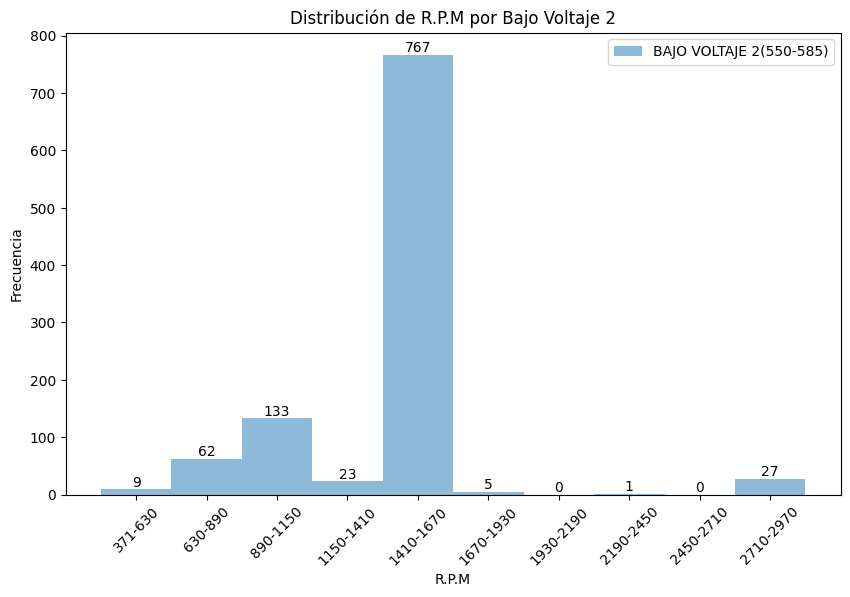

In [ ]:
# Filtrar el DataFrame para incluir solo 'BAJO VOLTAJE 2'
filtered_df = consolidado2[
    consolidado2['SEG_VOLT'] == 'BAJO VOLTAJE 2(550-585)'
]

# Crear el histograma
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura si es necesario
data = filtered_df['R.P.M']
n, bins, patches = plt.hist(data, bins=10, alpha=0.5, label='BAJO VOLTAJE 2(550-585)')

# Agregar etiquetas en la parte superior de cada barra
for count, x in zip(n, bins):
    plt.text(x + (bins[1] - bins[0]) / 2,  # Posición horizontal, centrada en cada barra
             count,  # Posición vertical (altura del texto)
             str(int(count)),  # Etiqueta de texto
             ha='center', va='bottom', fontsize=10)  # Alineación y tamaño de fuente

# Crear etiquetas personalizadas para los ticks del eje X utilizando los rangos
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1] + (bins[1] - bins[0]) / 2, labels=bin_labels, rotation=45)

# Configurar etiquetas y título del gráfico
plt.xlabel('R.P.M')
plt.ylabel('Frecuencia')
plt.title('Distribución de R.P.M por Bajo Voltaje 2')
plt.legend()
plt.show()


# ANALISIS DE POTENCIA

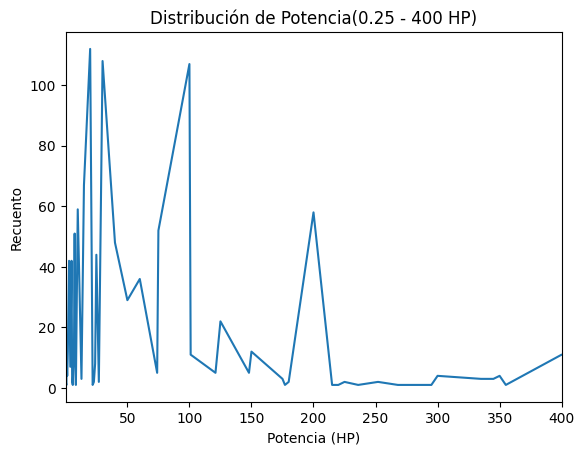

In [ ]:
# Agrupar por potencia y contar las ocurrencias
conteos_potencia = consolidado['POTENCIA (HP)'].value_counts().sort_index()

# Crear el gráfico de línea
plt.plot(conteos_potencia.index, conteos_potencia.values)
plt.xlabel('Potencia (HP)')
plt.ylabel('Recuento')
plt.title('Distribución de Potencia(0.25 - 400 HP)')
plt.xlim(min(consolidado['POTENCIA (HP)']), 400)  # Establecer el rango del eje x de 0 a 400
plt.show()


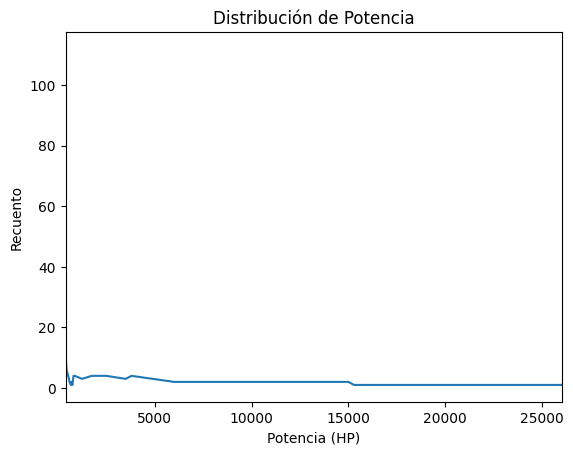

In [ ]:
# Crear el gráfico de línea
plt.plot(conteos_potencia.index, conteos_potencia.values)
plt.xlabel('Potencia (HP)')
plt.ylabel('Recuento')
plt.title('Distribución de Potencia')
plt.xlim(400, max(consolidado2['POTENCIA (HP)']))
plt.show()

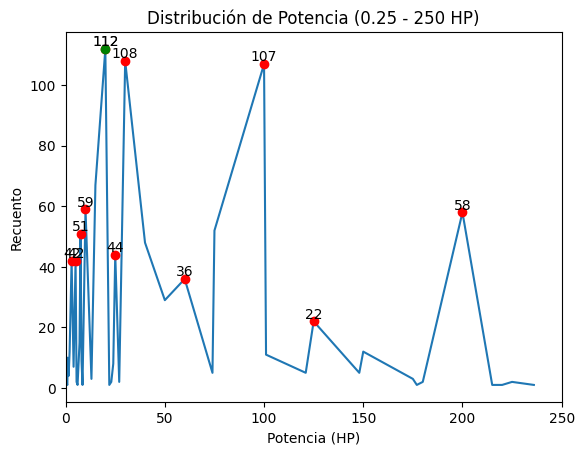

In [ ]:
# Agrupar por potencia y contar las ocurrencias
conteos_potencia = consolidado['POTENCIA (HP)'].value_counts().sort_index()

# Filtrar datos para el rango de 0 a 250
conteos_potencia_filtrado = conteos_potencia[(conteos_potencia.index >= 0) & (conteos_potencia.index <= 250)]

# Encontrar los picos locales
peaks, _ = find_peaks(conteos_potencia_filtrado.values, height=20)  # Ajusta el valor de 'height' según sea necesario

# Encontrar el pico global
max_value = conteos_potencia_filtrado.max()
max_index = conteos_potencia_filtrado.idxmax()

# Crear el gráfico de línea
plt.plot(conteos_potencia_filtrado.index, conteos_potencia_filtrado.values)
plt.xlabel('Potencia (HP)')
plt.ylabel('Recuento')
plt.title('Distribución de Potencia (0.25 - 250 HP)')
plt.xlim(0, 250)  # Establecer el rango del eje x de 0 a 250

# Etiquetar los picos locales
for peak in peaks:
  plt.plot(conteos_potencia_filtrado.index[peak], conteos_potencia_filtrado.values[peak], 'ro')
  plt.text(conteos_potencia_filtrado.index[peak], conteos_potencia_filtrado.values[peak],
            f'{conteos_potencia_filtrado.values[peak]}', ha='center', va='bottom')

# Etiquetar el pico global
plt.plot(max_index, max_value, 'go')
plt.text(max_index, max_value, f'{max_value}', ha='center', va='bottom')

plt.show()


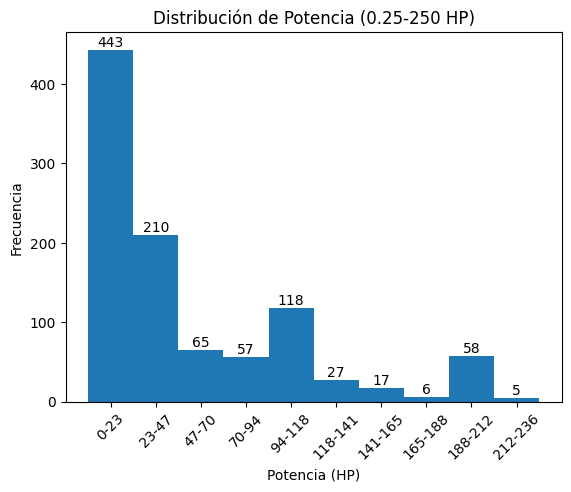

In [ ]:
# Filtrar el DataFrame para incluir solo potencias entre 0.25 y 250
filtered_df = consolidado2[(consolidado2['POTENCIA (HP)'] >= 0.25) & (consolidado2['POTENCIA (HP)'] <= 250)]

# Crear el histograma
n, bins, patches = plt.hist(filtered_df['POTENCIA (HP)'], bins=10)  # Ajusta el número de bins según sea necesario

# Agregar etiquetas en la parte superior de cada barra
for count, x in zip(n, bins):
    plt.text(x + (bins[1] - bins[0]) / 2,  # Posición horizontal, centrada en cada barra
             count,  # Posición vertical (altura del texto)
             str(int(count)),  # Etiqueta de texto
             ha='center', va='bottom', fontsize=10)  # Alineación y tamaño de fuente

# Crear etiquetas personalizadas para los ticks del eje X utilizando los rangos
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1] + (bins[1] - bins[0]) / 2, labels=bin_labels, rotation=45)

# Configurar etiquetas y título del gráfico
plt.xlabel('Potencia (HP)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Potencia (0.25-250 HP)')
plt.show()


HISTOGRAMA DE POTENCIAS FILTRADO PARA BAJO VOLTAJE 2

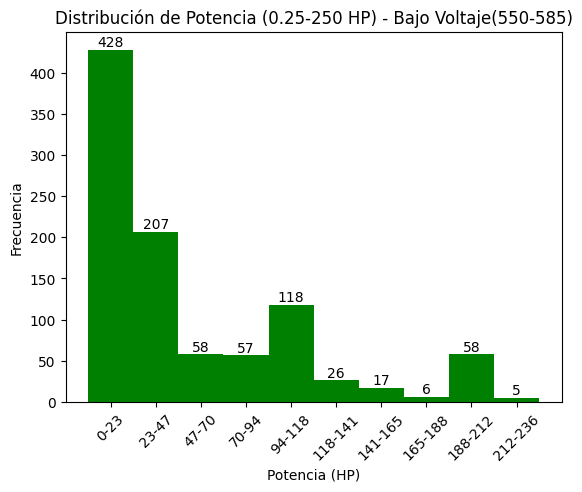

In [ ]:
filtered_df = consolidado2[
    (consolidado2['POTENCIA (HP)'] >= 0.25) &
    (consolidado2['POTENCIA (HP)'] <= 250) &
    (consolidado2['SEG_VOLT'] == 'BAJO VOLTAJE 2(550-585)')
]

# Crear el histograma
n, bins, patches = plt.hist(filtered_df['POTENCIA (HP)'], bins=10, color='green')

# Agregar etiquetas en la parte superior de cada barra
for count, x in zip(n, bins):
    plt.text(x + (bins[1] - bins[0]) / 2,
             count,
             str(int(count)),
             ha='center', va='bottom', fontsize=10)

# Crear etiquetas personalizadas para los ticks del eje X utilizando los rangos
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1] + (bins[1] - bins[0]) / 2, labels=bin_labels, rotation=45)

# Configurar etiquetas y título del gráfico
plt.xlabel('Potencia (HP)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Potencia (0.25-250 HP) - Bajo Voltaje(550-585)')
plt.show()


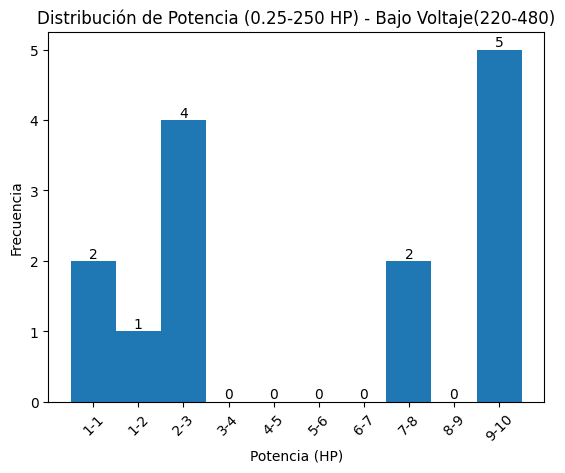

In [ ]:
filtered_df = consolidado2[
    (consolidado2['POTENCIA (HP)'] >= 0.25) &
    (consolidado2['POTENCIA (HP)'] <= 250) &
    (consolidado2['SEG_VOLT'] == 'BAJO VOLTAJE 1(220-480)')
]

# Crear el histograma
n, bins, patches = plt.hist(filtered_df['POTENCIA (HP)'], bins=10)

# Agregar etiquetas en la parte superior de cada barra
for count, x in zip(n, bins):
    plt.text(x + (bins[1] - bins[0]) / 2,
             count,
             str(int(count)),
             ha='center', va='bottom', fontsize=10)

# Crear etiquetas personalizadas para los ticks del eje X utilizando los rangos
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1] + (bins[1] - bins[0]) / 2, labels=bin_labels, rotation=45)

# Configurar etiquetas y título del gráfico
plt.xlabel('Potencia (HP)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Potencia (0.25-250 HP) - Bajo Voltaje(220-480)')
plt.show()

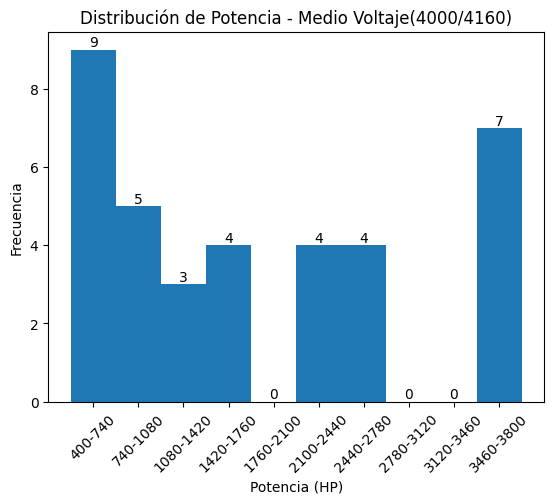

In [ ]:
# Filtrar el DataFrame
filtered_df = consolidado2[
    (consolidado2['POTENCIA (HP)'] >= 0.25) &
    (consolidado2['POTENCIA (HP)'] <= 4000) &
    (consolidado2['SEG_VOLT'] == 'MEDIO VOLTAJE(4000/4160)')
]

# Crear el histograma
n, bins, patches = plt.hist(filtered_df['POTENCIA (HP)'], bins=10)

# Agregar etiquetas en la parte superior de cada barra
for count, x in zip(n, bins):
    plt.text(x + (bins[1] - bins[0]) / 2,
             count,
             str(int(count)),
             ha='center', va='bottom', fontsize=10)

# Crear etiquetas personalizadas para los ticks del eje X utilizando los rangos
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1] + (bins[1] - bins[0]) / 2, labels=bin_labels, rotation=45)

# Configurar etiquetas y título del gráfico
plt.xlabel('Potencia (HP)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Potencia - Medio Voltaje(4000/4160)')
plt.show()
